In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys

sys.path.append("../")

In [5]:
import os
import torch

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [6]:
from datasets import load_dataset

TASKS = ['abstract_narrative_understanding', 'anachronisms', 'analogical_similarity', 'analytic_entailment', 'arithmetic', 'ascii_word_recognition', 'authorship_verification', 'auto_categorization', 'auto_debugging', 'bbq_lite_json', 'bridging_anaphora_resolution_barqa', 'causal_judgment', 'cause_and_effect', 'checkmate_in_one', 'chess_state_tracking', 'chinese_remainder_theorem', 'cifar10_classification', 'code_line_description', 'codenames', 'color', 'common_morpheme', 'conceptual_combinations', 'conlang_translation', 'contextual_parametric_knowledge_conflicts', 'crash_blossom', 'crass_ai', 'cryobiology_spanish', 'cryptonite', 'cs_algorithms', 'dark_humor_detection', 'date_understanding', 'disambiguation_qa', 'discourse_marker_prediction', 'disfl_qa', 'dyck_languages', 'elementary_math_qa', 'emoji_movie', 'emojis_emotion_prediction', 'empirical_judgments', 'english_proverbs', 'english_russian_proverbs', 'entailed_polarity', 'entailed_polarity_hindi', 'epistemic_reasoning', 'evaluating_information_essentiality', 'fact_checker', 'fantasy_reasoning', 'few_shot_nlg', 'figure_of_speech_detection', 'formal_fallacies_syllogisms_negation', 'gem', 'gender_inclusive_sentences_german', 'general_knowledge', 'geometric_shapes', 'goal_step_wikihow', 'gre_reading_comprehension', 'hhh_alignment', 'hindi_question_answering', 'hindu_knowledge', 'hinglish_toxicity', 'human_organs_senses', 'hyperbaton', 'identify_math_theorems', 'identify_odd_metaphor', 'implicatures', 'implicit_relations', 'indic_cause_and_effect', 'intent_recognition', 'international_phonetic_alphabet_nli', 'international_phonetic_alphabet_transliterate', 'intersect_geometry', 'irony_identification', 'kanji_ascii', 'kannada', 'key_value_maps', 'known_unknowns', 'language_games', 'language_identification', 'linguistic_mappings', 'linguistics_puzzles', 'list_functions', 'logic_grid_puzzle', 'logical_args', 'logical_deduction', 'logical_fallacy_detection', 'logical_sequence', 'mathematical_induction', 'matrixshapes', 'medical_questions_russian', 'metaphor_boolean', 'metaphor_understanding', 'minute_mysteries_qa', 'misconceptions', 'misconceptions_russian', 'mnist_ascii', 'modified_arithmetic', 'moral_permissibility', 'movie_dialog_same_or_different', 'movie_recommendation', 'mult_data_wrangling', 'navigate', 'nonsense_words_grammar', 'novel_concepts', 'object_counting', 'odd_one_out', 'operators', 'paragraph_segmentation', 'parsinlu_qa', 'parsinlu_reading_comprehension', 'penguins_in_a_table', 'periodic_elements', 'persian_idioms', 'phrase_relatedness', 'physical_intuition', 'physics', 'physics_questions', 'play_dialog_same_or_different', 'polish_sequence_labeling', 'presuppositions_as_nli', 'qa_wikidata', 'question_selection', 'real_or_fake_text', 'reasoning_about_colored_objects', 'repeat_copy_logic', 'rephrase', 'rhyming', 'riddle_sense', 'ruin_names', 'salient_translation_error_detection', 'scientific_press_release', 'semantic_parsing_in_context_sparc', 'semantic_parsing_spider', 'sentence_ambiguity', 'similarities_abstraction', 'simp_turing_concept', 'simple_arithmetic_json', 'simple_arithmetic_json_multiple_choice', 'simple_arithmetic_json_subtasks', 'simple_arithmetic_multiple_targets_json', 'simple_ethical_questions', 'simple_text_editing', 'snarks', 'social_iqa', 'social_support', 'sports_understanding', 'strange_stories', 'strategyqa', 'sufficient_information', 'suicide_risk', 'swahili_english_proverbs', 'swedish_to_german_proverbs', 'symbol_interpretation', 'tellmewhy', 'temporal_sequences', 'tense', 'timedial', 'topical_chat', 'tracking_shuffled_objects', 'understanding_fables', 'undo_permutation', 'unit_conversion', 'unit_interpretation', 'unnatural_in_context_learning', 'vitaminc_fact_verification', 'what_is_the_tao', 'which_wiki_edit', 'winowhy', 'word_sorting', 'word_unscrambling']
N = 64

tasks = ['abstract_narrative_understanding', 'arithmetic',  'rhyming', 'topical_chat']

datasets = {}
for task in tasks:
    datasets[task] = load_dataset("tasksource/bigbench", task)["validation"].select(range(N))

/home/djaniak/mambaforge/envs/info/lib/python3.10/site-packages/datasets/load.py:1486: FutureWarning: The repository for tasksource/bigbench contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/tasksource/bigbench
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
/home/djaniak/mambaforge/envs/info/lib/python3.10/site-packages/datasets/load.py:1486: FutureWarning: The repository for tasksource/bigbench contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/tasksource/bigbench
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major 

In [7]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "meta-llama/Llama-2-7b-chat-hf"
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True, device_map="auto", torch_dtype=torch.float16)
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

/home/djaniak/mambaforge/envs/info/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/home/djaniak/mambaforge/envs/info/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [13]:
model.device

device(type='cuda', index=0)

In [33]:
model_name = "meta-llama/Llama-2-7b-chat-hf"
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True, device_map="auto", torch_dtype=torch.float16)
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

text = ["The quick brown fox jumps over the lazy dog."]
inputs = tokenizer(text, return_tensors="pt").to(device)

outputs = model(**inputs, output_attentions=True)
attentions = torch.stack([attn.detach().cpu() for attn in outputs.attentions])

del outputs
torch.cuda.empty_cache() 

In [37]:
inputs

{'input_ids': tensor([[    1,   450,  4996, 17354,  1701, 29916,   432, 17204,   975,   278,
         17366, 11203, 29889]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [34]:
tokens = [tokenizer.decode(t) for t in inputs["input_ids"][0]]
print(tokens)

['<s>', 'The', 'quick', 'brown', 'fo', 'x', 'j', 'umps', 'over', 'the', 'lazy', 'dog', '.']


In [31]:
attentions.shape

torch.Size([32, 1, 32, 13, 13])

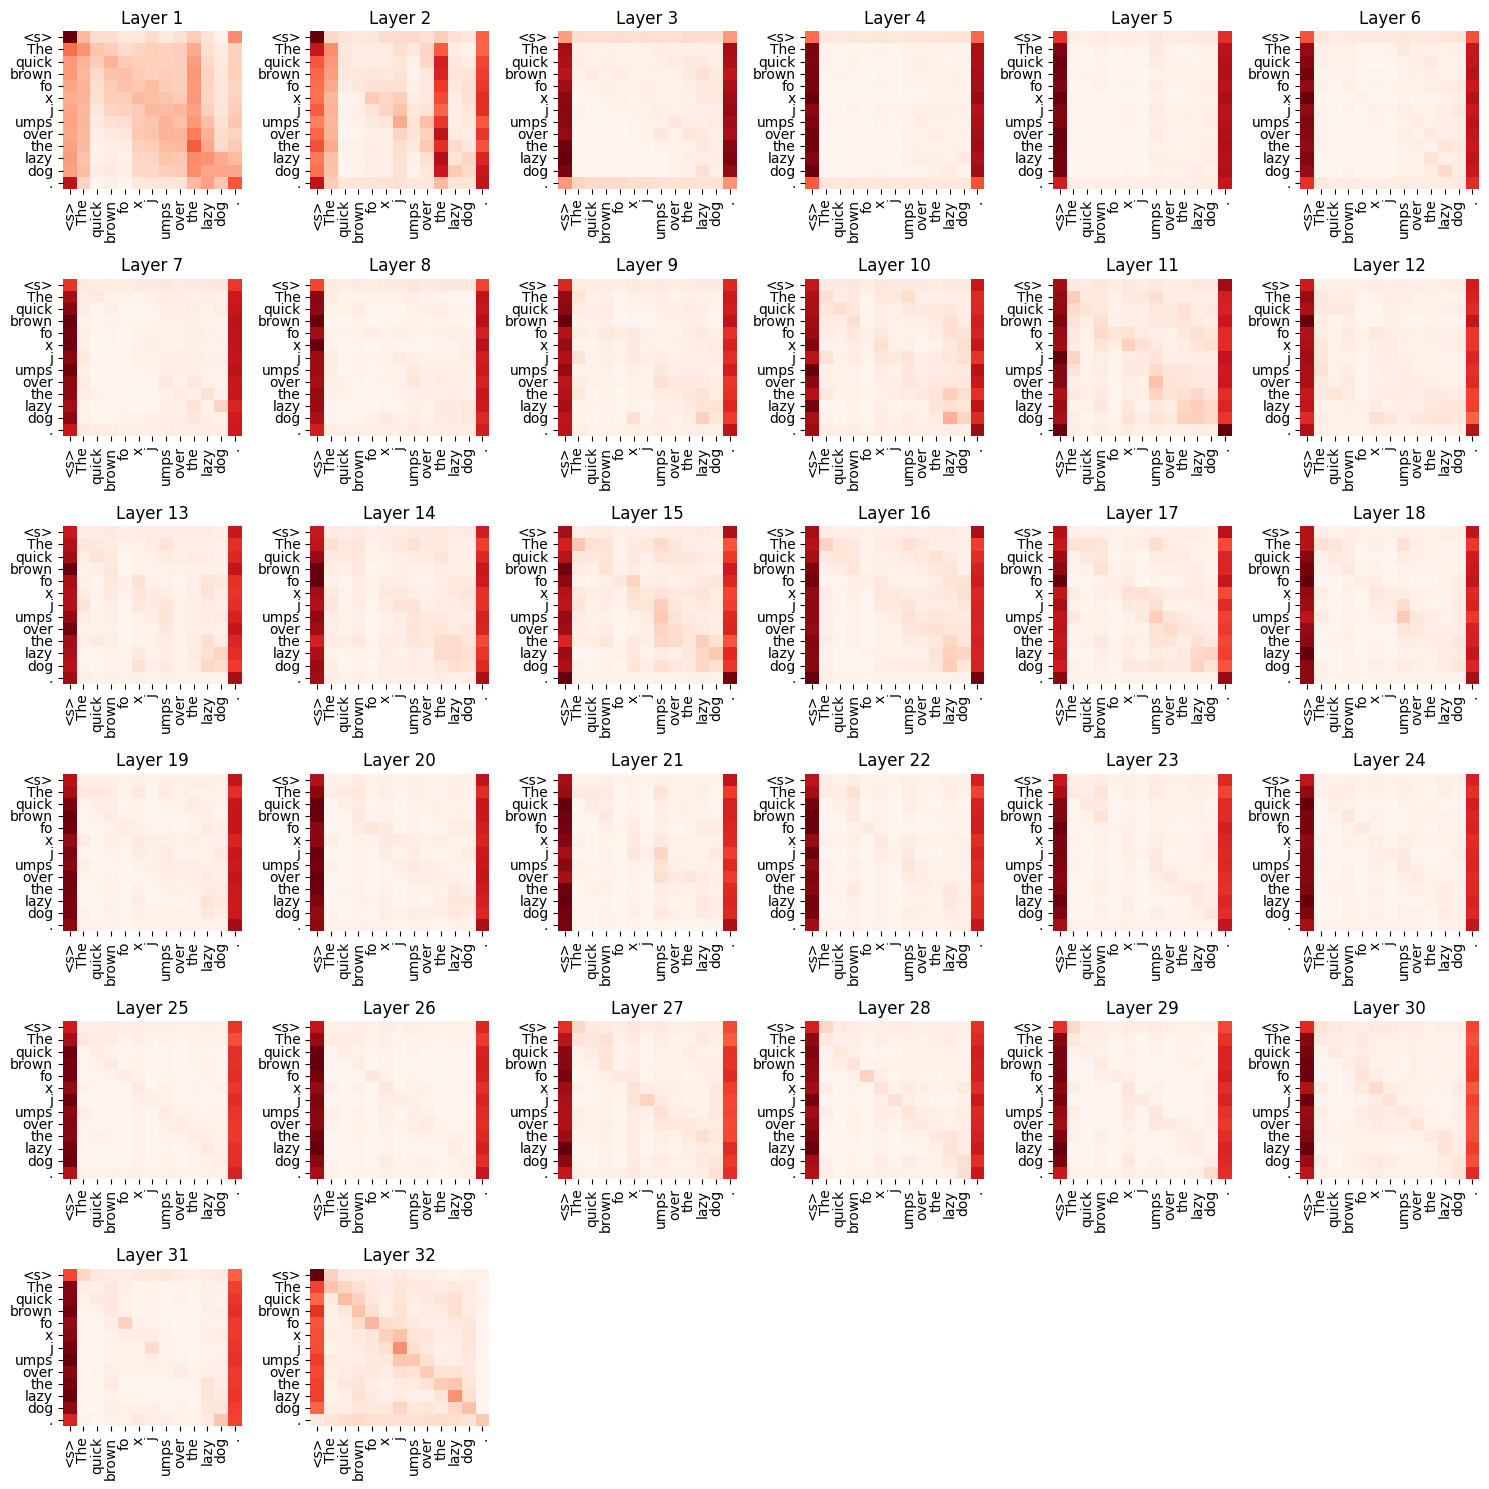

In [36]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_attention_matrices_grid(attention_tensor, tokens, figsize=(15, 15)):
    num_layers, batch_size, num_heads, num_tokens, _ = attention_tensor.shape
    
    assert batch_size == 1
    
    nrows = math.ceil(math.sqrt(num_layers))
    ncols = math.ceil(num_layers / nrows)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    
    for layer_idx in range(num_layers):
        attention_matrix = attention_tensor[layer_idx, 0, :, :, :].mean(dim=0).numpy()
        
        sns.heatmap(attention_matrix, xticklabels=tokens, yticklabels=tokens, cmap="Reds", 
                    ax=axes[layer_idx], cbar=False, annot=False)
        axes[layer_idx].set_title(f'Layer {layer_idx + 1}')
    
    for i in range(layer_idx + 1, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_attention_matrices_grid(attentions, tokens)

In [40]:
attentions.shape

torch.Size([32, 1, 32, 13, 13])

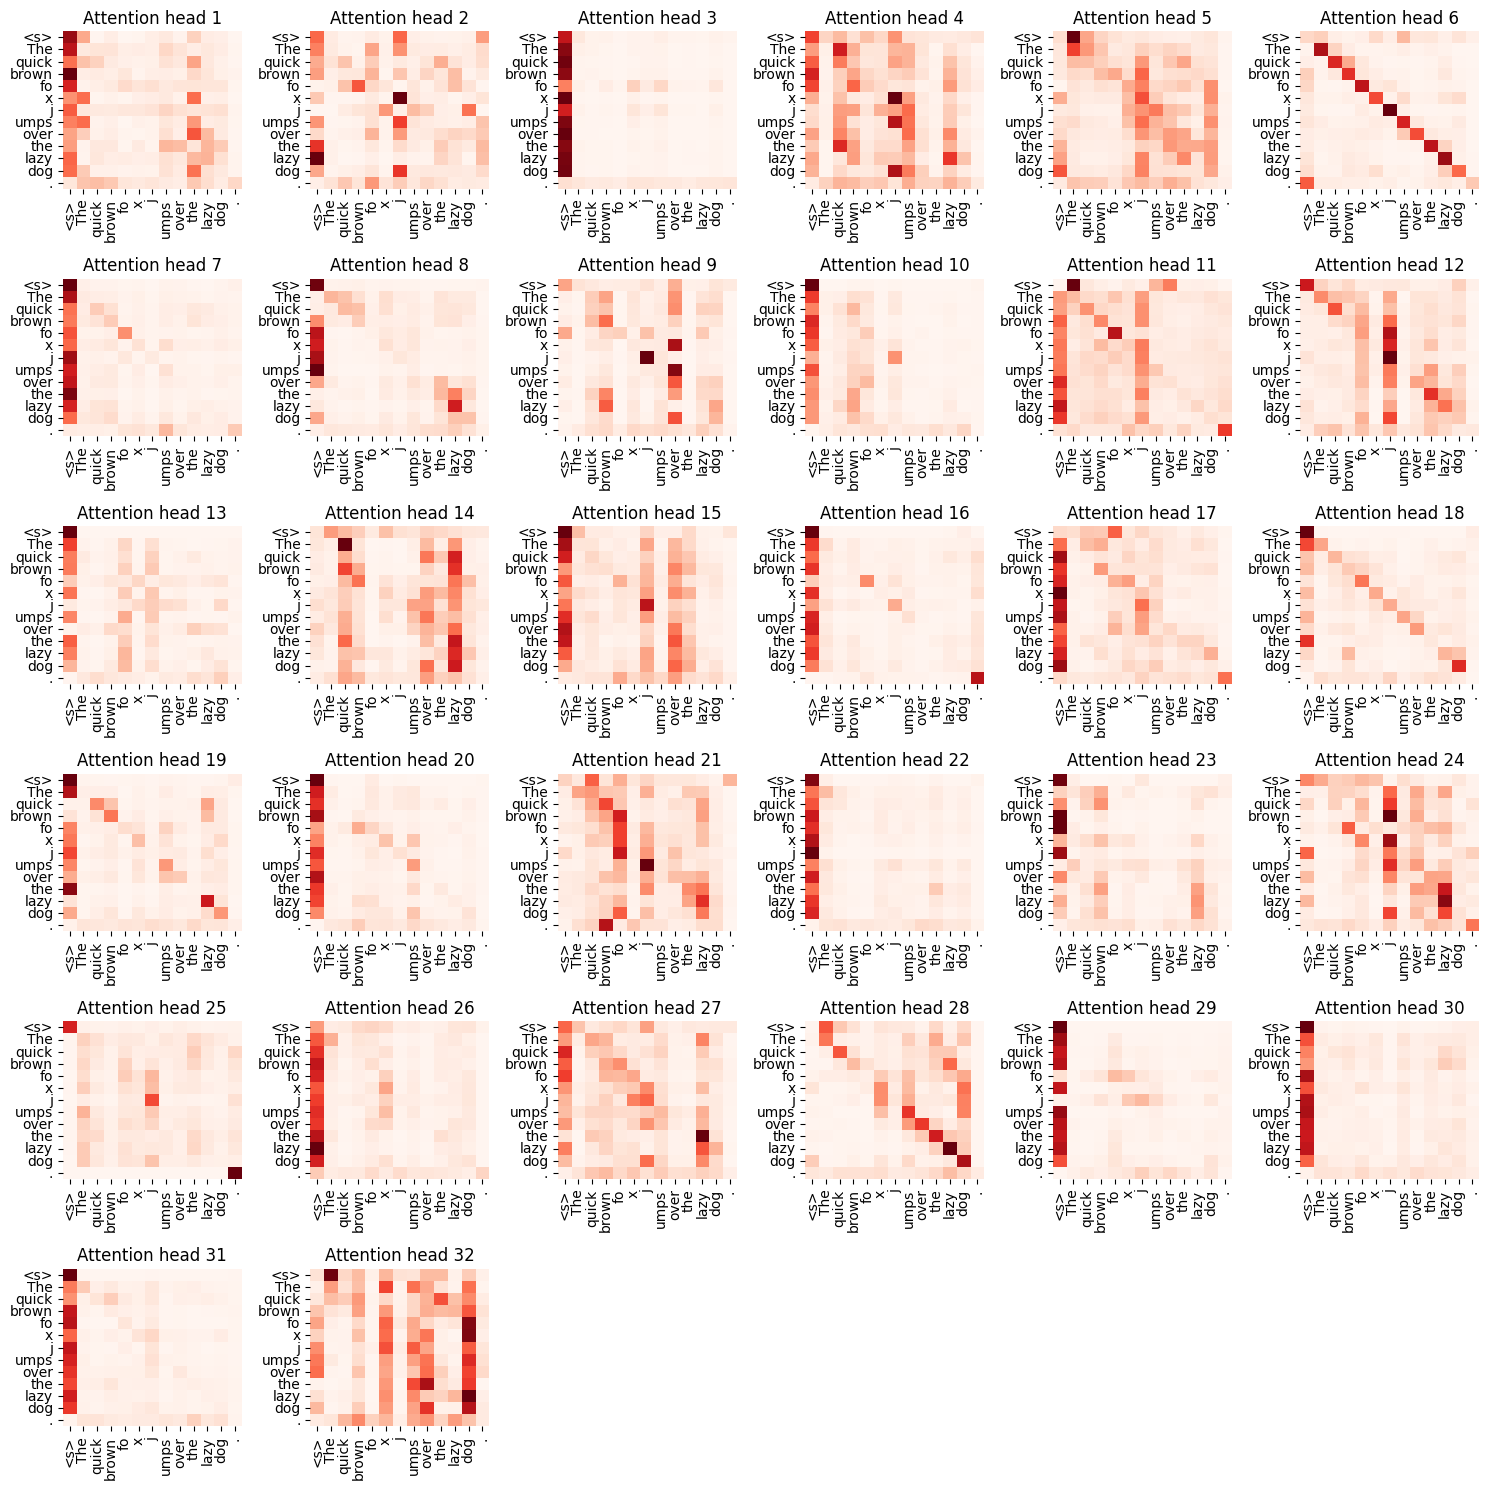

In [43]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_attention_matrices_grid_for_each_head(attention_tensor, tokens, layer_idx, figsize=(15, 15)):
    num_layers, batch_size, num_heads, num_tokens, _ = attention_tensor.shape
    
    assert batch_size == 1
    
    nrows = math.ceil(math.sqrt(num_heads))
    ncols = math.ceil(num_heads / nrows)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten() 
    
    for attn_head_idx in range(num_heads):
        attention_matrix = attention_tensor[layer_idx, 0, attn_head_idx, :, :].numpy()
        
        sns.heatmap(attention_matrix, xticklabels=tokens, yticklabels=tokens, cmap="Reds", 
                    ax=axes[attn_head_idx], cbar=False, annot=False)
        axes[attn_head_idx].set_title(f'Attention head {attn_head_idx + 1}')
    
    for i in range(attn_head_idx + 1, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_attention_matrices_grid_for_each_head(attentions, tokens, layer_idx=-1)

In [20]:
for i, layer_attention in enumerate(attentions):
    if i < 3 or i > 28:
        print(f"Layer {i + 1} attention shape: {layer_attention.shape}")
    if i == 3:
        print("...")

attention_weights_layer_1_head_1 = attentions[0][0, 0]
print(
    f"Attention weights from Layer 1, Head 1 ({attention_weights_layer_1_head_1.shape}): {attention_weights_layer_1_head_1[:10]}"
)

Layer 1 attention shape: torch.Size([1, 32, 13, 13])
Layer 2 attention shape: torch.Size([1, 32, 13, 13])
Layer 3 attention shape: torch.Size([1, 32, 13, 13])
...
Layer 30 attention shape: torch.Size([1, 32, 13, 13])
Layer 31 attention shape: torch.Size([1, 32, 13, 13])
Layer 32 attention shape: torch.Size([1, 32, 13, 13])
Attention weights from Layer 1, Head 1 (torch.Size([13, 13])): tensor([[0.1569, 0.0265, 0.0434, 0.0788, 0.0862, 0.0314, 0.0405, 0.0694, 0.0236,
         0.0575, 0.0812, 0.0559, 0.2488],
        [0.3552, 0.0103, 0.0259, 0.0241, 0.0673, 0.0477, 0.0872, 0.0190, 0.0276,
         0.1458, 0.0289, 0.0280, 0.1331],
        [0.0980, 0.0087, 0.0407, 0.0381, 0.1364, 0.0818, 0.0980, 0.0345, 0.0440,
         0.2362, 0.0395, 0.0474, 0.0968],
        [0.0774, 0.0102, 0.0376, 0.0343, 0.1837, 0.0970, 0.1131, 0.0309, 0.0406,
         0.1925, 0.0367, 0.0522, 0.0936],
        [0.0771, 0.0141, 0.0317, 0.0281, 0.1722, 0.1198, 0.1394, 0.0256, 0.0359,
         0.1461, 0.0317, 0.0518, 0.1265

# Compute attentions task- and layer-wise

In [11]:
from torch.utils.data import DataLoader
from tqdm import tqdm
from collections import defaultdict
import numpy as np
from functools import partial

batch_size = 4
attentions = defaultdict(list)


def collate_tokenize(data, max_seq_length):
    text_batch = [element["inputs"] for element in data]
    tokenized = tokenizer(
        text_batch, 
        padding='max_length', 
        truncation=True, 
        max_length=max_seq_length, 
        return_tensors='pt'
    ).to(device)
    return tokenized


for task, dataset in tqdm(datasets.items()):
    max_length = np.max([len(tokenizer(example["inputs"])["input_ids"]) for example in dataset])
    collate_fn = partial(collate_tokenize, max_seq_length=max_length)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    
    for batch in dataloader:
        inputs = batch
        with torch.no_grad():
            output = model(**inputs, output_attentions=True)

        attns = [attn.cpu() for attn in output.attentions]
        attentions[task].append(torch.stack(attns))
        
        del output 
        torch.cuda.empty_cache() 

    attentions[task] = torch.cat(attentions[task], dim=1)

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [02:45<00:00, 41.29s/it]


In [12]:
attentions[task].shape

torch.Size([32, 64, 32, 1182, 1182])

In [21]:
# Example attention tensor
attention_tensor = torch.rand(12, 1, 8, 10, 10)  # Random tensor for example

# Select the specific attention matrix (layer, batch item, head)
layer_idx = 0       # First layer
batch_idx = 0       # First item in the batch
head_idx = 0        # First attention head
attention_matrix = attentions[task][layer_idx, batch_idx, head_idx, :, :]

attention_matrix.shape

# # Define the tokens in the sequence (assuming length 10 here)
# tokens = ["He", "later", "went", "to", "report", "Malaysia", "for", "one", "year", "."]

# # Plot the attention matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(attention_matrix, xticklabels=tokens, yticklabels=tokens, cmap="Reds", annot=False)
# plt.show()

TypeError: list indices must be integers or slices, not str

100%|██████████| 4/4 [00:00<00:00, 50.86it/s]

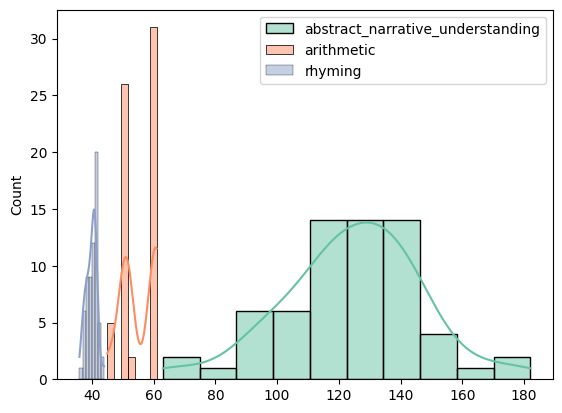

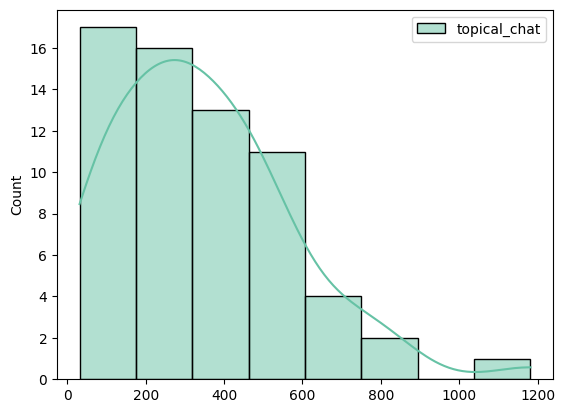

In [129]:
task_lengths = {}
for task, dataset in tqdm(datasets.items()):
    task_lengths[task] = np.array([len(tokenizer(example["inputs"])["input_ids"]) for example in dataset])


import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for task, lengths in task_lengths.items():
    if task != "topical_chat":
        sns.histplot(lengths, kde=True, label=task, ax=ax, color=sns.color_palette("Set2")[len(ax.lines)])
    
ax.legend()
plt.show()

fig, ax = plt.subplots()

for task, lengths in task_lengths.items():
    if task == "topical_chat":
        sns.histplot(lengths, kde=True, label=task, ax=ax, color=sns.color_palette("Set2")[len(ax.lines)])
    
ax.legend()
plt.show()


# Plotting func

In [19]:
import matplotlib.pyplot as plt


def plot_attention_stats_per_layer(layer_attention_distances, stat_name, title=None):
    plt.figure(figsize=(15, 5))
    for head in range(layer_attention_distances.shape[2]):
        plt.scatter(
            range(1, layer_attention_distances.shape[0] + 1),
            layer_attention_distances[:, 0, head],
            label=f"Head {head + 1}",
            alpha=0.6,
        )
    title = title or f"Attention {stat_name} per Layer"
    plt.xlabel("Layer Number")
    plt.ylabel(f"Attention {stat_name}")
    plt.title(title)
    plt.xticks(range(1, layer_attention_distances.shape[0] + 1))
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

# Attention distances

`compute_attention_distance` function measures how far, on average, a token attends to other tokens in the sequence.

Mathematically, it's computed as the weighted average of the distances between the token positions, where the weights are the attention scores.

A **high attention** distance indicates that a token is attending to other tokens that are far away (in terms of sequence position), while a **low attention** distance suggests that the token is mostly attending to nearby tokens.

Attention distance helps us understand whether the model is focusing on local context (nearby tokens) or global context (distant tokens) when making predictions.
For example, in the early layers of a transformer, the model might focus on local relationships (short-range dependencies), indicated by lower attention distances. In later layers, the model might shift to capturing broader, more global relationships (long-range dependencies), leading to higher attention distances.

In [120]:
def compute_attention_distance(attn_weights):
    """
    Compute attention distance given attention weights.
    attn_weights: (batch_size, num_heads, seq_length, seq_length)
    Returns: (batch_size, num_heads)
    """
    seq_length = attn_weights.size(-1)
    distance_matrix = torch.abs(
        torch.arange(seq_length).view(-1, 1) - torch.arange(seq_length).view(1, -1)
    )
    distance_matrix = distance_matrix.to(attn_weights.device)

    # multiply attention weights by the distance matrix and average over the sequence
    attention_distance = torch.sum(attn_weights * distance_matrix, dim=-1).mean(dim=-1)

    return attention_distance

In [121]:
task_layer_attention_distances = {}
for task, attn_data in attentions.items():
    layer_attention_distances = []
    for i, layer_attention in enumerate(attn_data):
        attention_distance = compute_attention_distance(layer_attention)
        layer_attention_distances.append(attention_distance)
    task_layer_attention_distances[task] = torch.stack(layer_attention_distances)


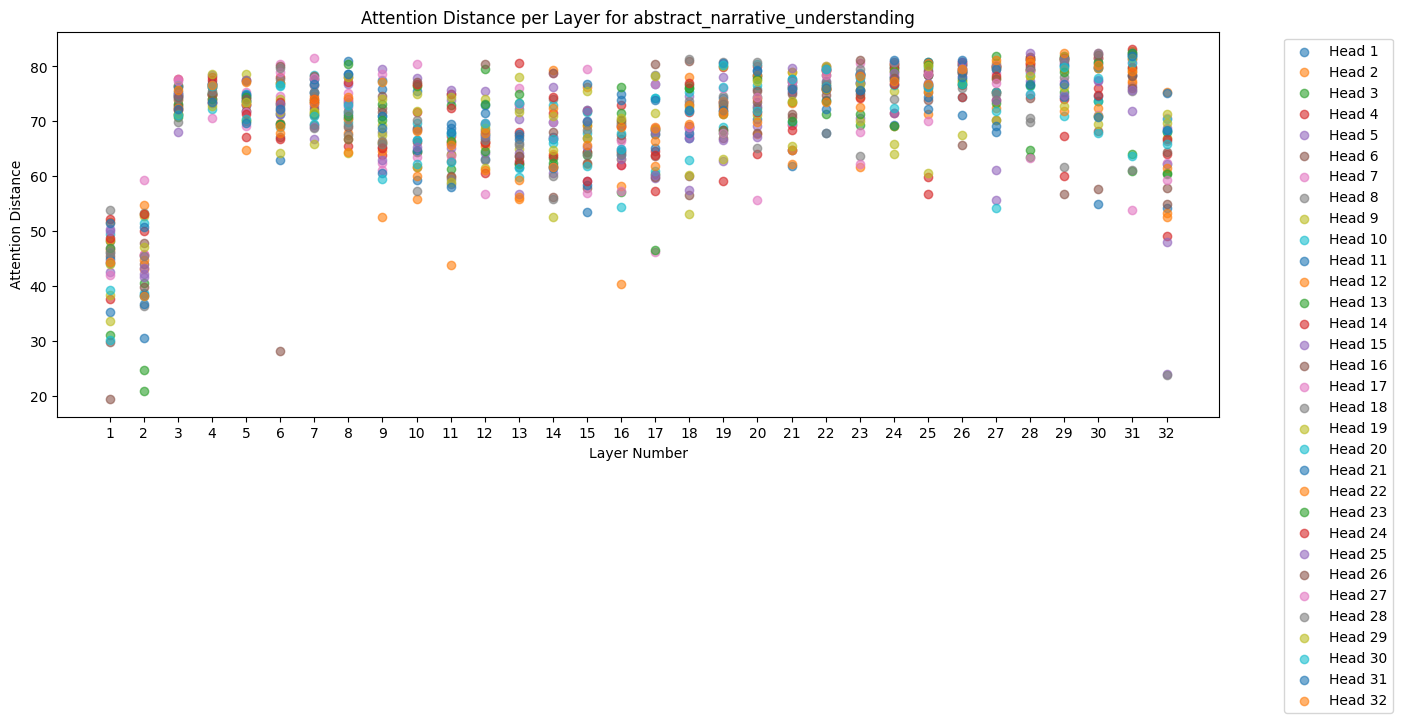

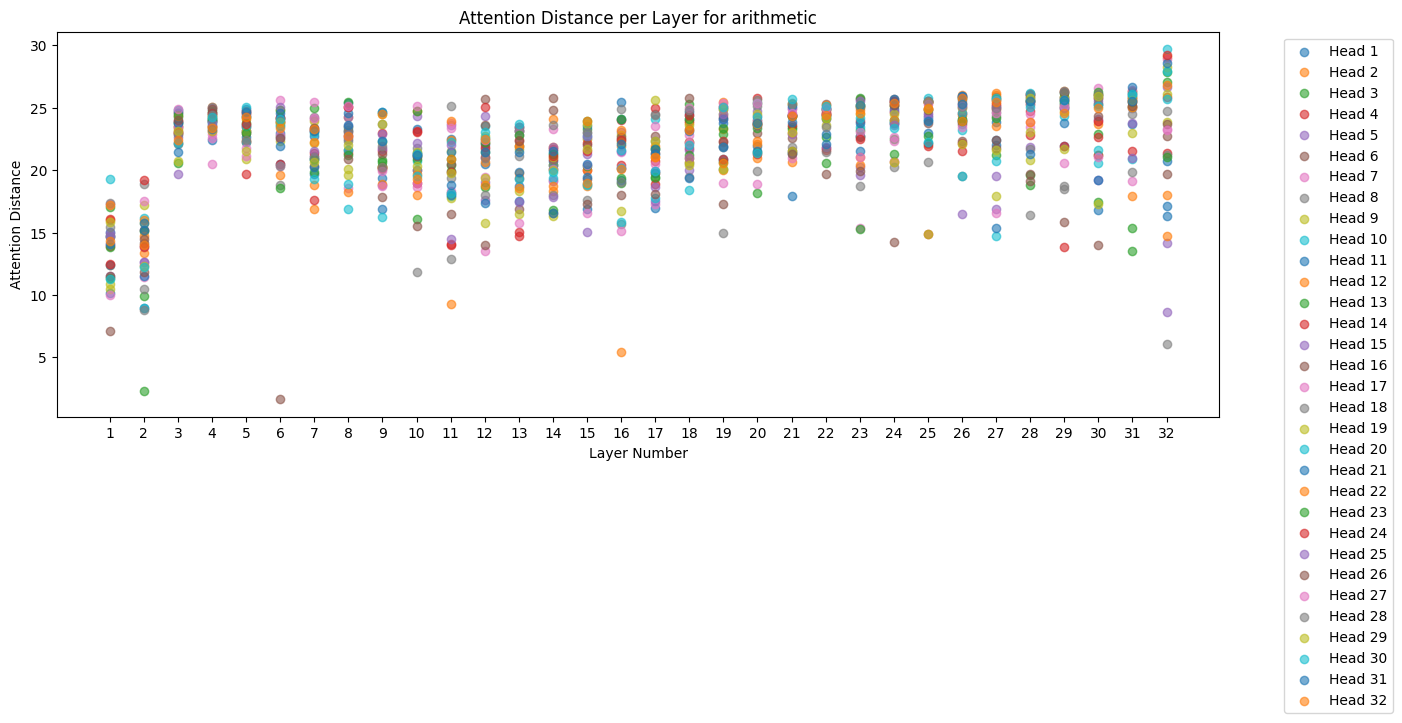

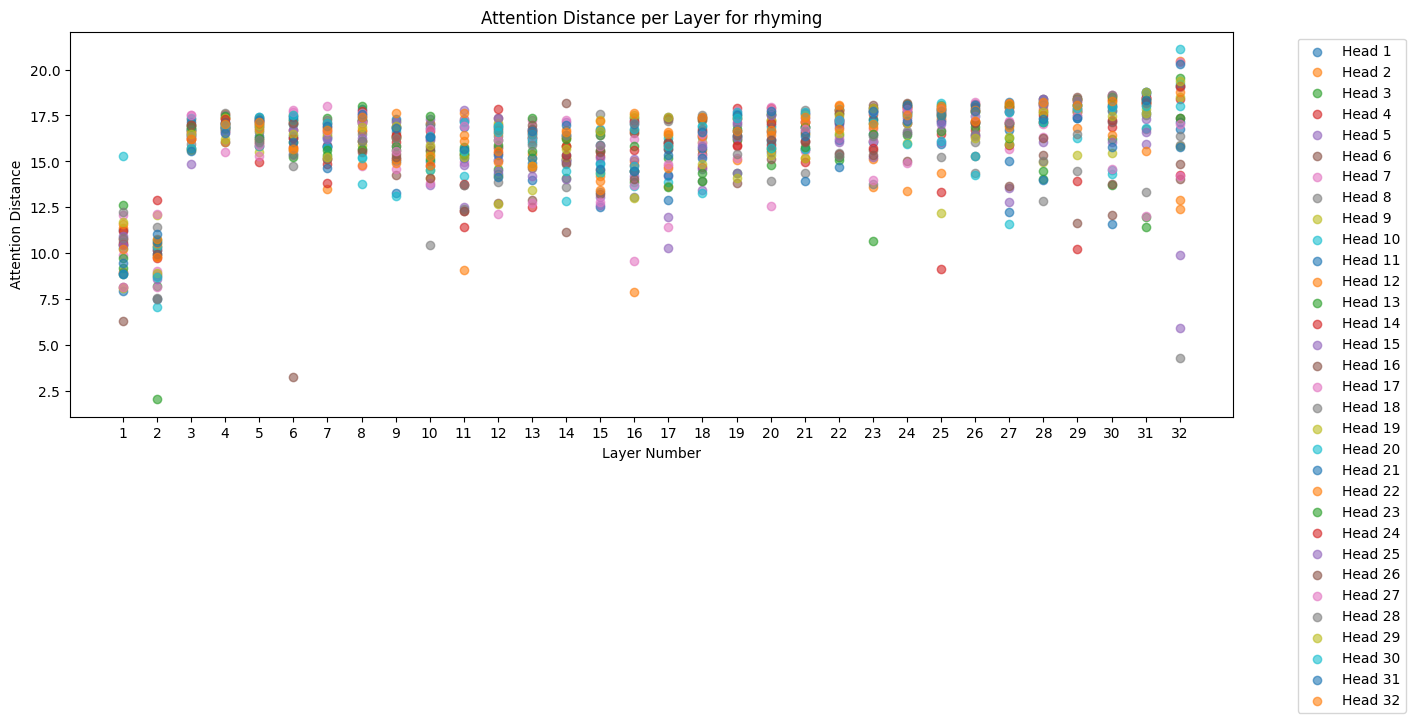

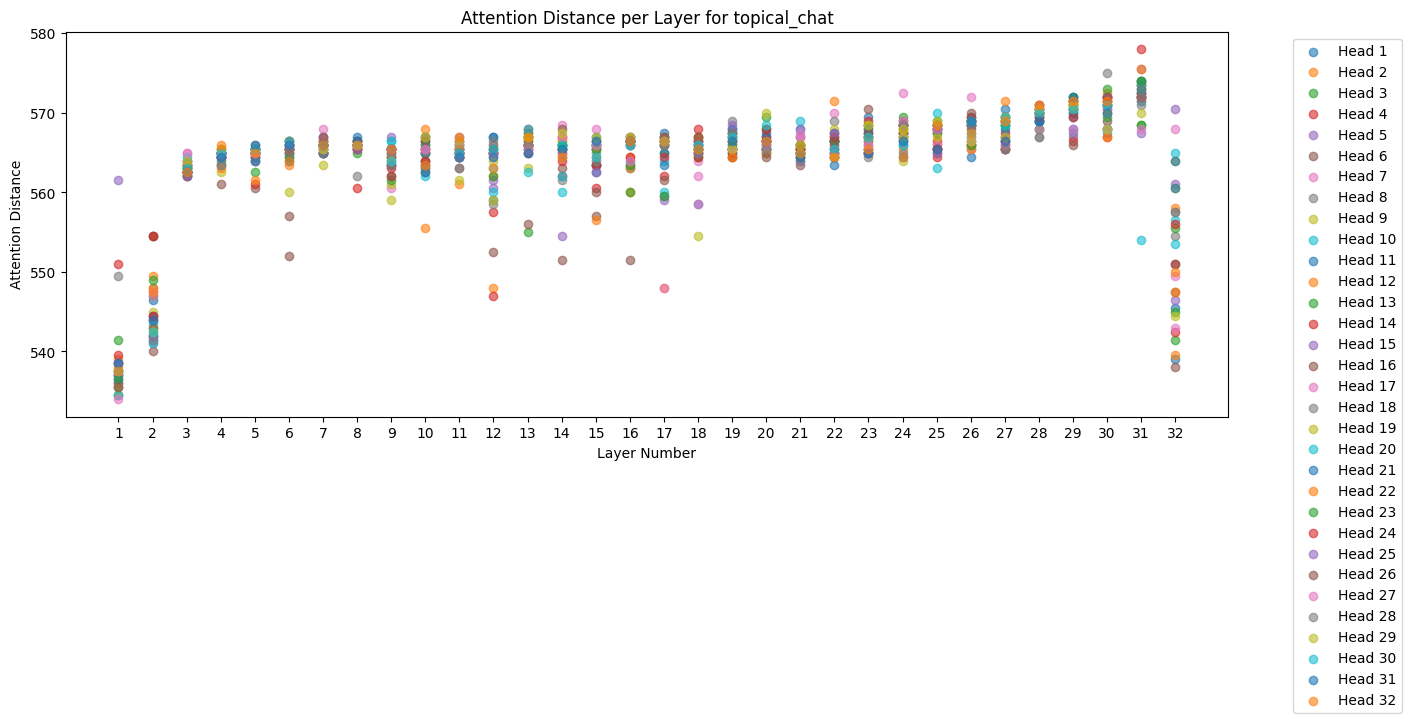

In [122]:
for task, attn_data in task_layer_attention_distances.items():
    plot_attention_stats_per_layer(attn_data, stat_name="Distance", title=f"Attention Distance per Layer for {task}")

# Attention entropy

The `compute_attention_entropy` function calculates the entropy of the attention distribution for each attention head in each layer of a transformer model. Entropy, in this context, measures the uncertainty or "spread" of the attention distribution — how uniformly the attention is distributed across all tokens in the sequence.

If the entropy is **low**, it means the attention distribution is sharp and focused — the attention head is concentrating its focus on a few specific tokens in the sequence.

If the entropy is **high**, it indicates a more uniform distribution — the attention head is spreading its focus more evenly across many tokens in the sequence.

In [130]:
from scipy.stats import entropy
import numpy as np


def compute_attention_entropy(attn_weights):
    """
    Compute the entropy of attention weights.
    attn_weights: (batch_size, num_heads, seq_length, seq_length)
    Returns: (batch_size, num_heads)
    """
    # sum over the last dimension to collapse the attention scores into probabilities;
    # each element represents the total attention given by a head to each token,
    # aggregated across all positions in the sequence
    attn_probs = attn_weights.sum(dim=-2)  # (batch_size, num_heads, seq_length)
    attn_probs = attn_probs / attn_probs.sum(
        dim=-1, keepdim=True
    )  # normalize to get probabilities
    attn_entropy = entropy(attn_probs.detach().numpy(), axis=-1)
    return attn_entropy

In [131]:
import numpy as np

task_layer_attention_entropies = {}
for task, attn_data in attentions.items():
    layer_attention_entropies = []
    for i, layer_attention in enumerate(attn_data):
        attention_entropy = compute_attention_entropy(layer_attention)
        layer_attention_entropies.append(attention_entropy)
    task_layer_attention_entropies[task] = np.stack(layer_attention_entropies)

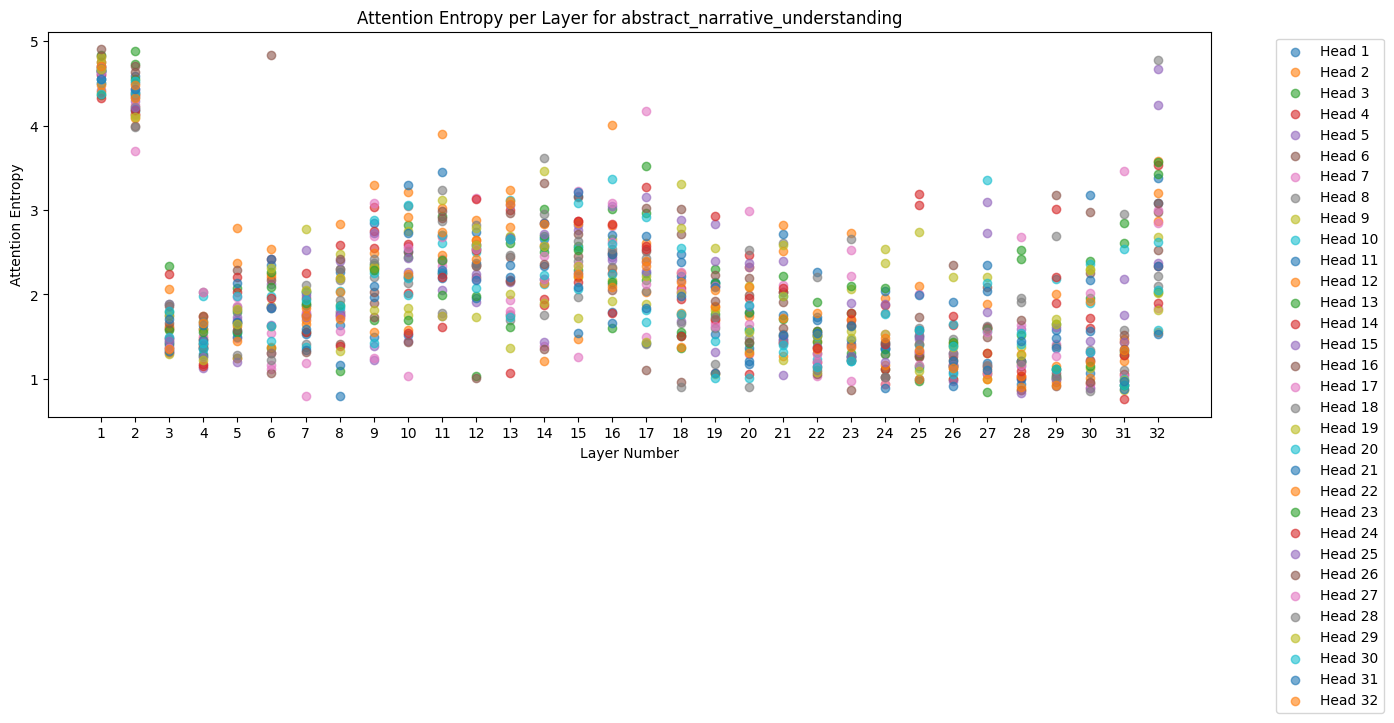

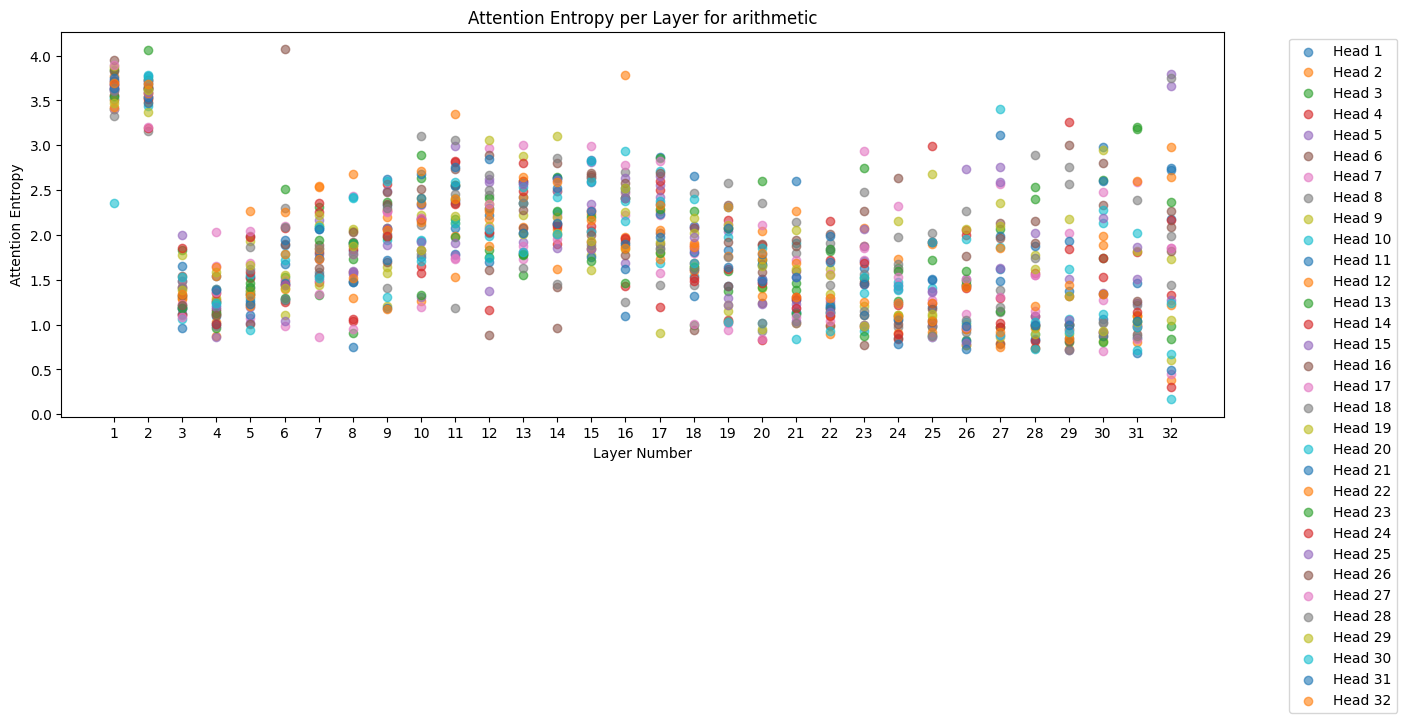

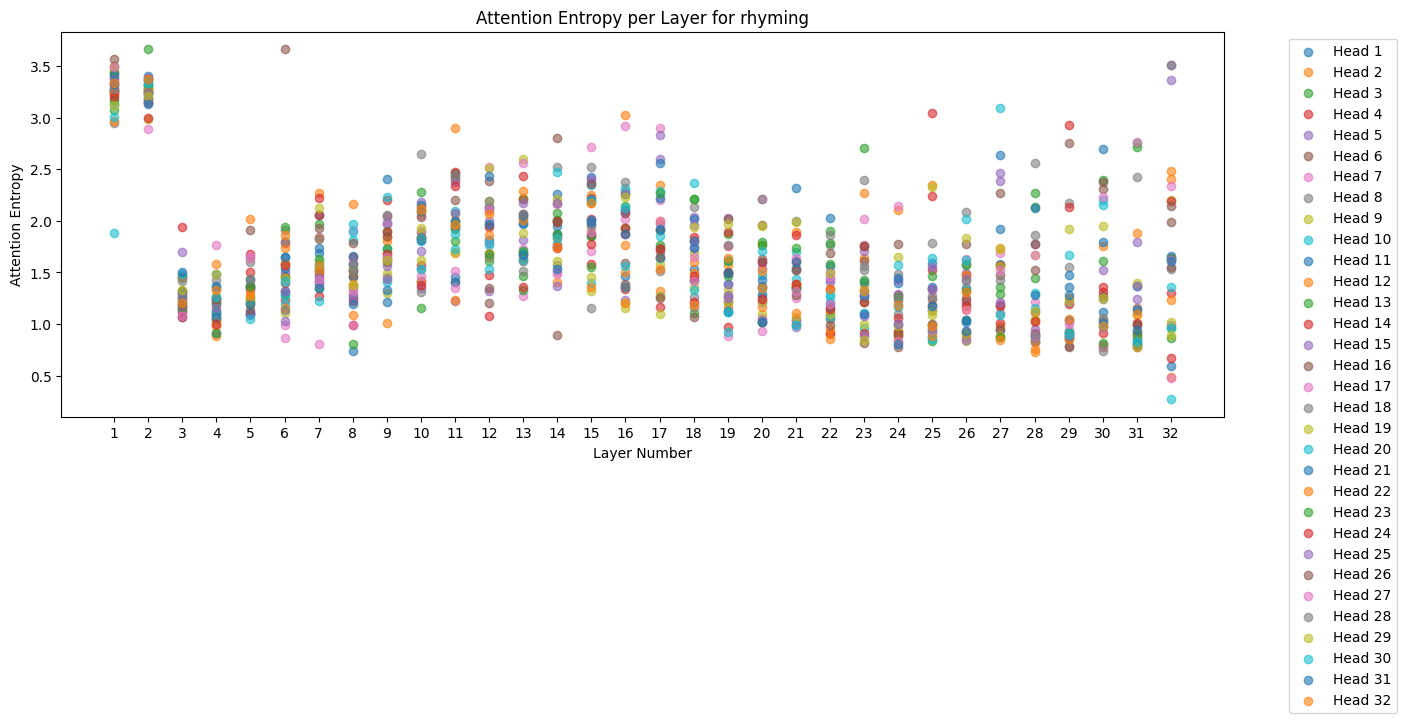

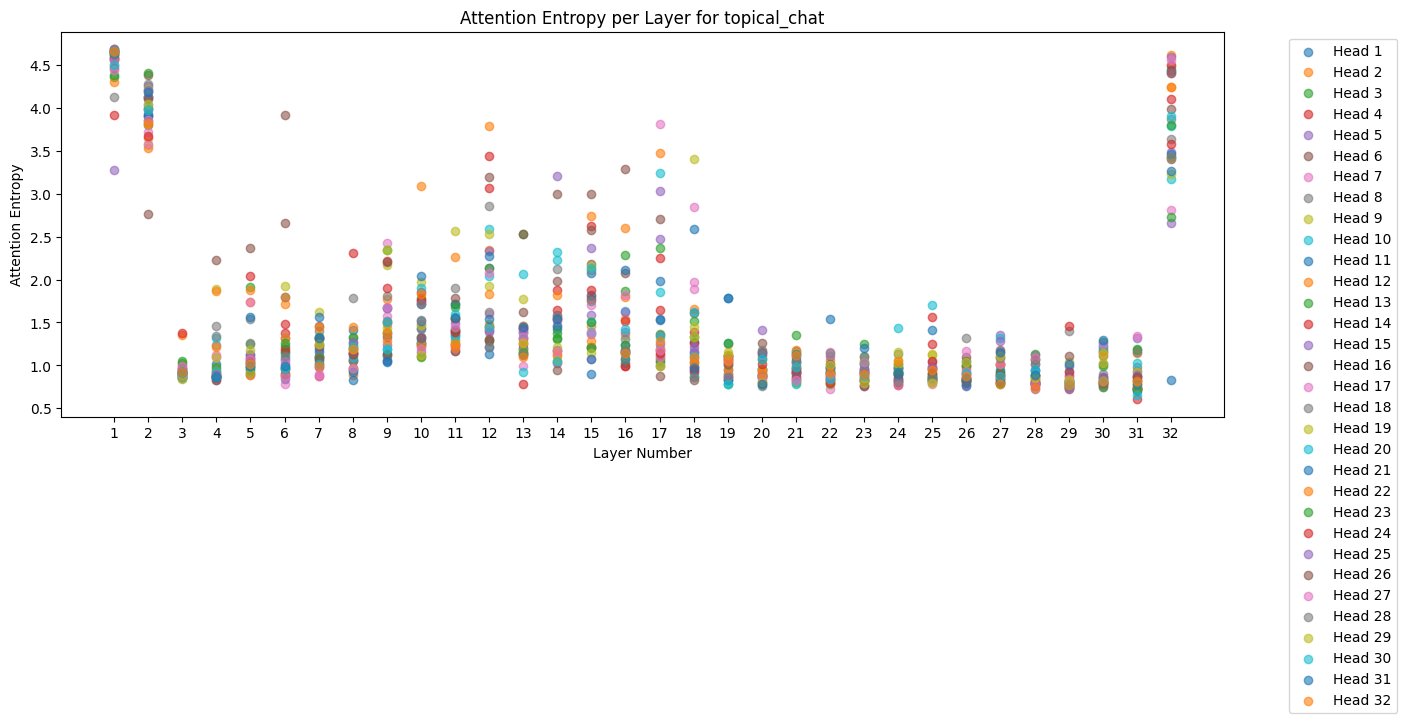

In [132]:
for task, attn_data in task_layer_attention_entropies.items():
    plot_attention_stats_per_layer(attn_data, stat_name="Entropy", title=f"Attention Entropy per Layer for {task}")

# KL divergence between attention distributions of different heads

`compute_kl_divergence` computes the Kullback–Leibler (KL) divergence between the attention maps of different heads in each layer, which results in KL divergence between attention distributions of different heads w.r.t different layers.

**Large** KL-divergence on attention maps of different heads indicates that different attention heads tend to aggregate different tokens on all layers. 
Losing diversity across different attention heads may limit the capacity of the model.

In [133]:
import numpy as np
from scipy.special import rel_entr

def compute_kl_divergence(attn_weights):
    """
    Compute the KL divergence between attention distributions of different heads.
    attn_weights: (batch_size, num_heads, seq_length, seq_length)
    Returns: (batch_size, num_heads, num_heads)
    """
    batch_size, num_heads, seq_length, _ = attn_weights.shape
    
    # sum over the last dimension to collapse the attention scores into probabilities
    attn_probs = attn_weights.sum(dim=-2)  # (batch_size, num_heads, seq_length)
    attn_probs = attn_probs / attn_probs.sum(dim=-1, keepdim=True) # normalize to get probabilities
    
    # compute KL divergence between each pair of heads
    kl_divergence_matrix = np.zeros((batch_size, num_heads, num_heads))
    for i in range(num_heads):
        for j in range(num_heads):
            if i != j:
                kl_div = rel_entr(attn_probs[:, i, :].numpy(), attn_probs[:, j, :].numpy())
                kl_divergence_matrix[:, i, j] = np.sum(kl_div, axis=-1)
    
    return kl_divergence_matrix  # (batch_size, num_heads, num_heads)


In [154]:
import numpy as np

task_kl_divergences_per_layer = {}
task_avg_kl_divergences = {}

for task, attn_data in tqdm(attentions.items()):
    kl_divergences_per_layer = []
    avg_kl_divergences = []
    for i, layer_attention in enumerate(attn_data):
        kl_divergence_matrix = compute_kl_divergence(layer_attention)
        # average over the batch dimension
        avg_kl_div = np.mean(kl_divergence_matrix, axis=0)  # (num_heads, num_heads)
        # store individual KL divergence values (excluding diagonal)
        kl_divergences_per_layer.append(avg_kl_div[np.triu_indices(avg_kl_div.shape[0], k=1)].flatten())
        # store the average KL divergence for the layer
        avg_kl_divergences.append(np.mean([x for x in kl_divergences_per_layer[-1] if x != np.inf]))
    task_kl_divergences_per_layer[task] = kl_divergences_per_layer
    task_avg_kl_divergences[task] = avg_kl_divergences
    

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [01:13<00:00, 18.44s/it]


In [155]:
def plot_kl_divergence_per_layer(kl_divergences_per_layer, avg_kl_divergences):
    plt.figure(figsize=(15, 5))
    for i, kl_divs in enumerate(kl_divergences_per_layer):
        plt.scatter([i+1]*len(kl_divs), kl_divs, alpha=0.5)
    
    plt.plot(range(1, len(avg_kl_divergences) + 1), avg_kl_divergences, 'o-', color='orange', markersize=10, label='Average KL Divergence')
    
    plt.xlabel('Layer Number')
    plt.ylabel('KL Divergence')
    plt.title('KL Divergence between Attention Distributions of Different Heads')
    plt.xticks(range(1, len(avg_kl_divergences) + 1))
    plt.legend()
    plt.show()

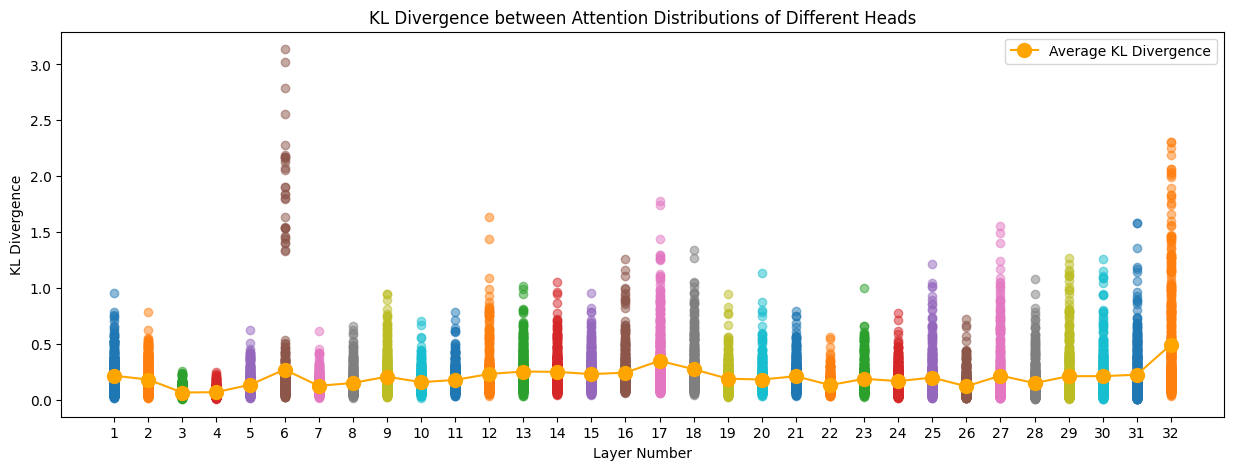

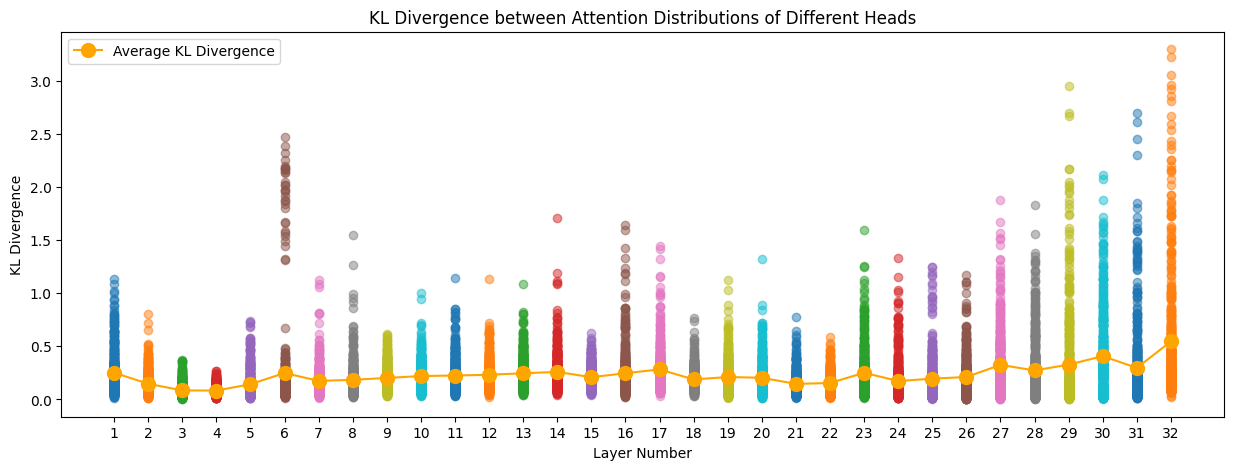

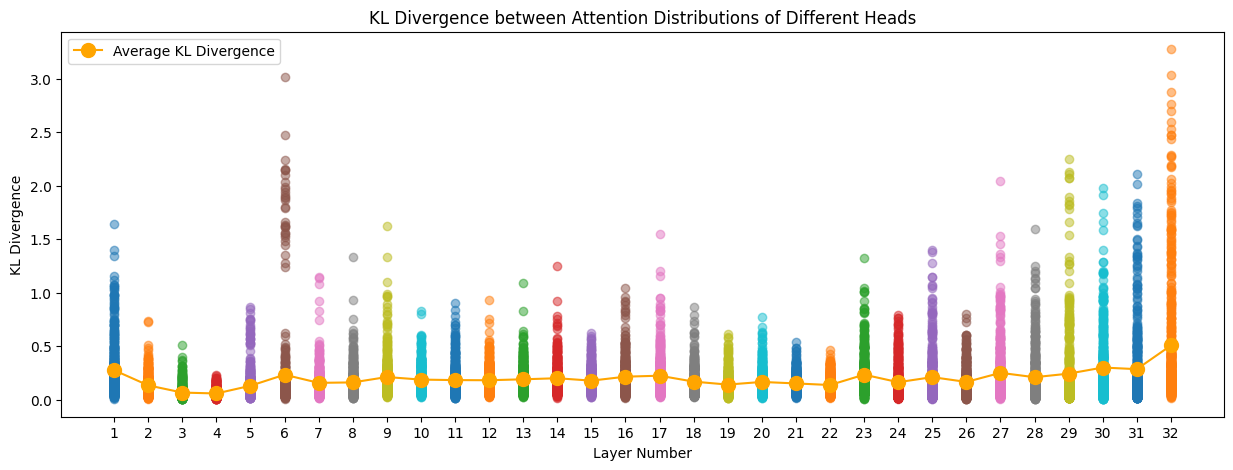

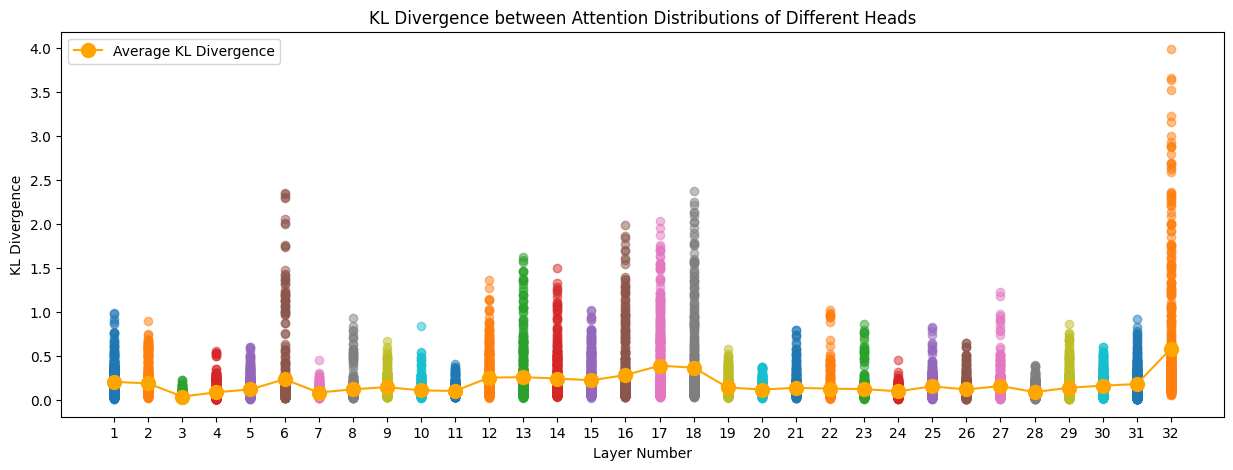

In [156]:
for (task, attn_data), (task, attn_data2) in zip(task_kl_divergences_per_layer.items(), task_avg_kl_divergences.items()):
    plot_kl_divergence_per_layer(attn_data, attn_data2)